✅ Dataset Loaded Successfully!
Shape: (1025, 12)
Unique values in target column: [0 1]


,cp,sex,exang,ca,thal,thalach,trestbps,chol,slope,age,oldpeak,target
0,-0.915755,0.661504,-0.712287,1.209221,1.089852,0.821321,-0.377636,-0.659332,0.995433,-0.268437,-0.060888,0
1,-0.915755,0.661504,1.403928,-0.731971,1.089852,0.255968,0.479107,-0.833861,-2.243675,-0.158157,1.727137,0
2,-0.915755,0.661504,1.403928,-0.731971,1.089852,-1.048692,0.764688,-1.396233,-2.243675,1.716595,1.301417,0
3,-0.915755,0.661504,-0.712287,0.238625,1.089852,0.516900,0.936037,-0.833861,0.995433,0.724079,-0.912329,0
4,-0.915755,-1.511706,-0.712287,2.179817,-0.522122,-1.874977,0.364875,0.930822,-0.624121,0.834359,0.705408,0


✅ Dataset Loaded Successfully!
Shape: (1025, 12)
Shape of features for clustering: (1025, 11)

🔹 Running K-Means Clustering...


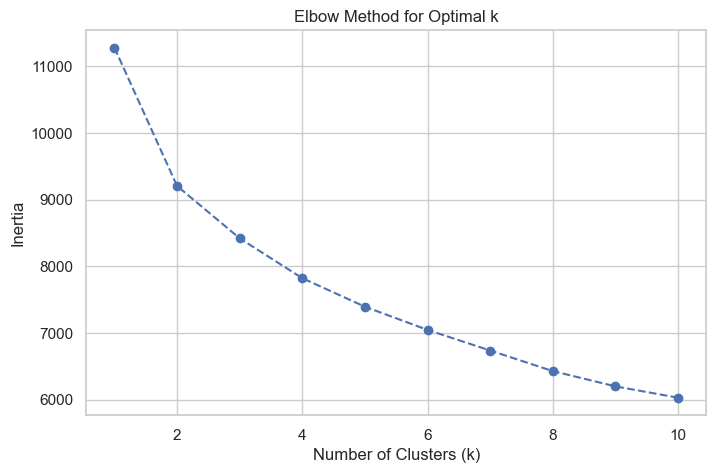

Silhouette Score (KMeans, k=2): 0.1934


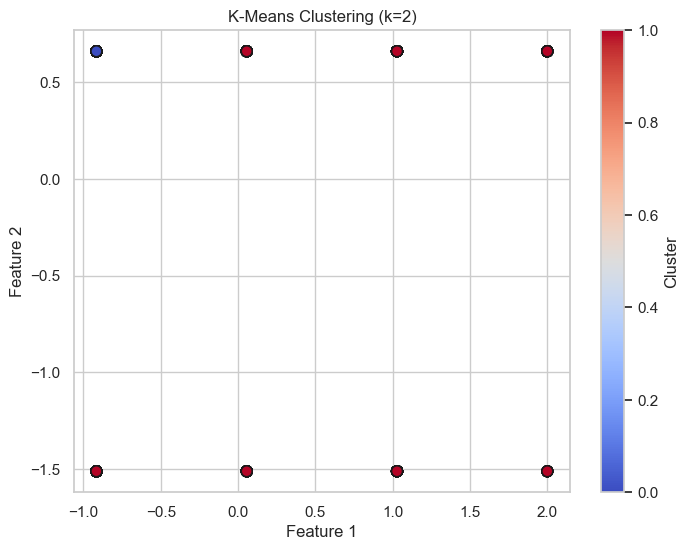


🔹 Running Hierarchical Clustering...


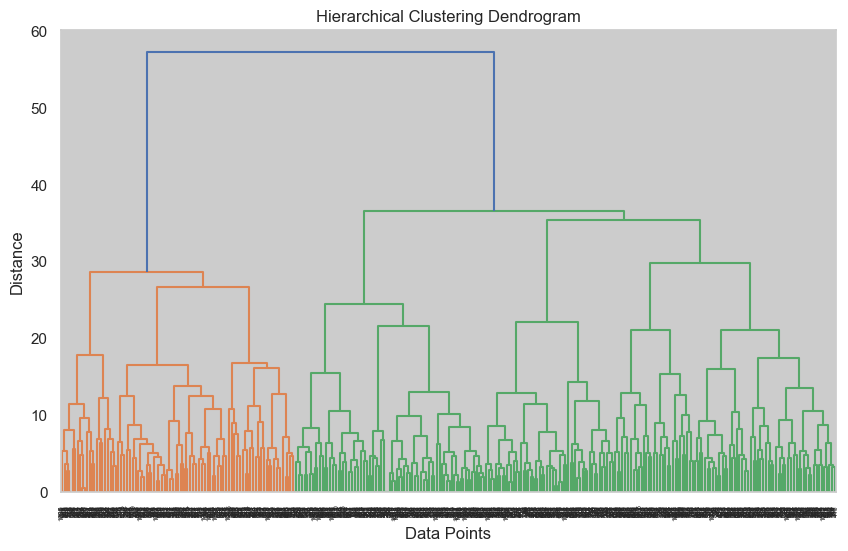

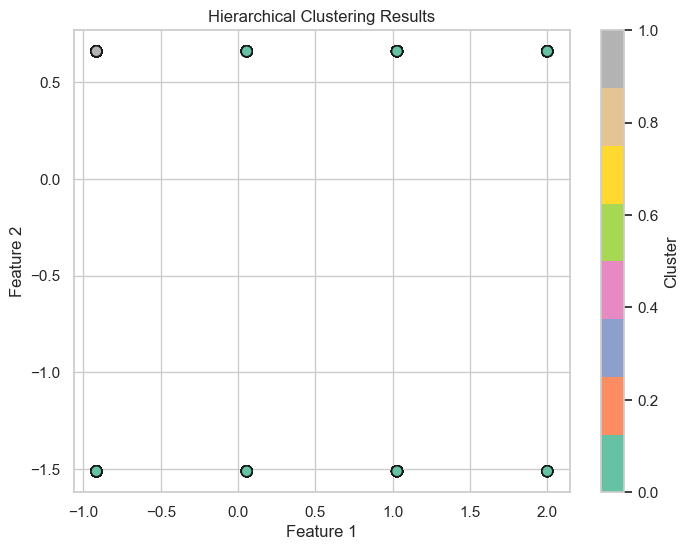


🔹 Comparing Clusters with Actual Labels:
Cluster      0    1
Actual             
-1.026698  342  157
 0.973997   41  485

✅ Clustering results saved as 'heart_clustering_results.csv'


In [1]:

# STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# STEP 2: LOAD DATASET (WITHOUT TARGET)
#new code
# STEP 2: LOAD REDUCED DATASET
df = pd.read_csv("heart_selected_features.csv")
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)

# 🔹 FIX: Force target to be binary integers (0 or 1)
if 'target' in df.columns:
    df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0).astype(int)

print("Unique values in target column:", df["target"].unique())
display(df.head())

#end of new code
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)

# Drop target column since clustering is unsupervised
if 'target' in df.columns:
    X = df.drop("target", axis=1)
else:
    X = df.copy()

# Standardize features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of features for clustering:", X_scaled.shape)

# STEP 3: K-MEANS CLUSTERING
# =====================================
print("\n🔹 Running K-Means Clustering...")

# Find optimal K using Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--", color="b")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Let's choose K = 2 for binary clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

# Calculate silhouette score
silhouette_kmeans = silhouette_score(X_scaled, df["KMeans_Cluster"])
print(f"Silhouette Score (KMeans, k={k}): {silhouette_kmeans:.4f}")

# Visualize KMeans Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["KMeans_Cluster"], cmap="coolwarm", edgecolor="k", s=60)
plt.title(f"K-Means Clustering (k={k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

# =====================================
# STEP 4: HIERARCHICAL CLUSTERING
# =====================================
print("\n🔹 Running Hierarchical Clustering...")

# Generate linkage matrix for dendrogram
linked = linkage(X_scaled, method="ward")

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation="top", distance_sort="ascending", show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Let's use 2 clusters for comparison
hierarchical = AgglomerativeClustering(n_clusters=2, linkage="ward")
df["Hierarchical_Cluster"] = hierarchical.fit_predict(X_scaled)

# Visualize Hierarchical Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["Hierarchical_Cluster"], cmap="Set2", edgecolor="k", s=60)
plt.title("Hierarchical Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

# =====================================
# STEP 5: COMPARE CLUSTERS WITH TARGET LABELS
# =====================================
if "target" in pd.read_csv("heart_selected_features.csv").columns:
    df["target"] = pd.read_csv("heart_selected_features.csv")["target"]
    print("\n🔹 Comparing Clusters with Actual Labels:")
    comparison = pd.crosstab(df["target"], df["KMeans_Cluster"], rownames=["Actual"], colnames=["Cluster"])
    print(comparison)

# =====================================
# STEP 6: SAVE CLUSTERING RESULTS
# =====================================
df.to_csv("heart_clustering_results.csv", index=False)
print("\n✅ Clustering results saved as 'heart_clustering_results.csv'")
